# Программа визуализации расчетов Уравнения Переноса

In [16]:
from configs import *

print(OutputDir)
print(CalculationResultsPath)
print(Calculation1DResultsPath)

print(PlotOutputPath)
print(Plot1DOutputPath)

C:\Programing\Projects\DigitalGeometry\Programs\Output
C:\Programing\Projects\DigitalGeometry\Programs\Output\CalculationResults
C:\Programing\Projects\DigitalGeometry\Programs\Output\CalculationResults\Solver1D
C:\Programing\Projects\DigitalGeometry\Programs\Output\GraphicsResults
C:\Programing\Projects\DigitalGeometry\Programs\Output\GraphicsResults\Solver1D


## Считывание рассчитанных значений из файла

In [17]:
def read1DMinimalOutput(filename):
    file = open(filename, "r")

    meshParamsLine = file.readline()
    cellCount, dx = [float(val) for val in meshParamsLine.split("\t") if val != ""][:3]
    cellCount = int(cellCount)
    
    timeParamsLine = file.readline()
    NTimeSteps, realNTimeSteps, dt  = [float(val) for val in timeParamsLine.split("\t") if val != ""][:3]
    NTimeSteps = int(NTimeSteps)
    realNTimeSteps = int(realNTimeSteps)
    
    frames = []
    for i in range(realNTimeSteps+1):
        line = file.readline()
        f = [float(fi) for fi in line.split("\t") if len(fi)>1 or fi.isnumeric()]
        frames.append(f)
    
    file.close()
    return cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames

In [18]:
def xCells(cellCount, dx):
    #https://stackoverflow.com/questions/31820107/is-there-a-numpy-function-that-allows-you-to-specify-start-step-and-number
    return [dx/2+i*dx for i in range(cellCount)]

## Построение графиков

Для построения графиков и записи анимации используются библиотеки matplotlib и celluloid.

In [19]:
import matplotlib.pyplot as plt
#import numpy as np

In [20]:
def plotArea1D(cellCount, dx, frame, plotTitle):
    fig = plt.figure(figsize=(24, 8))
    ax = plt.axes(xlim=(0, dx*cellCount), ylim=(-0.1, 1.25))
    ax.grid()
    ax.set(xlabel='x', ylabel='f')

    x = xCells(cellCount, dx)
    y = frame

    plt.bar(x, y, color = ['cornflowerblue'], width = dx)

    if cellCount < 100:
        plt.plot(x, y, 'ro')
        for i,j in zip(x,y):
            ax.annotate("{:10.4f}".format(j),xy=(i,j), ha='left', rotation=90)

    plt.title(plotTitle)
    plt.savefig(downDir(plotOutPath, plotTitle + ".png"))
    plt.show()

## Построение анимации

In [21]:
from matplotlib import animation
from celluloid import Camera

In [22]:
def animation1D(cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames, slowmo, plotTitle):
    fig = plt.figure(figsize=(24, 9))
    ax = plt.axes(xlim=(0, dx*cellCount), ylim=(-0.1, 1.25))
    ax.grid()
    
    x = xCells(cellCount, dx)
    
    camera = Camera(fig)
    for frame in frames:
        y = frame
        plt.bar(x, y, color = ['cornflowerblue'], width = dx)
        if cellCount < 100:
            plt.plot(x, y, 'ro')
            for i,j in zip(x,y):
                ax.annotate("{:10.4f}".format(j),xy=(i,j), ha='left', rotation=90)
    
        camera.snap()

    animation = camera.animate()

    time = dt * NTimeSteps
    print("Animation time: ", time)
    realTimeStep = time / realNTimeSteps * slowmo
    print("Animation real time step: ", realTimeStep)
    fps = 1 / realTimeStep
    print("Animation fps: ", fps)

    animation.save(downDir(plotOutPath, plotTitle + "_anim.gif"), writer='PillowWriter', fps=fps)

## Solver1DStripMovementTest

In [23]:
title = "Solver1DStripMovementTest"
calcResPath = downDir(Calculation1DResultsPath, title)
plotOutPath = downDir(Plot1DOutputPath, title)

### Считывание значений

In [24]:
cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames = read1DMinimalOutput(downDir(calcResPath, "area_64_t_200.txt"))

### Построение графиков и анимации

#### Построение графиков

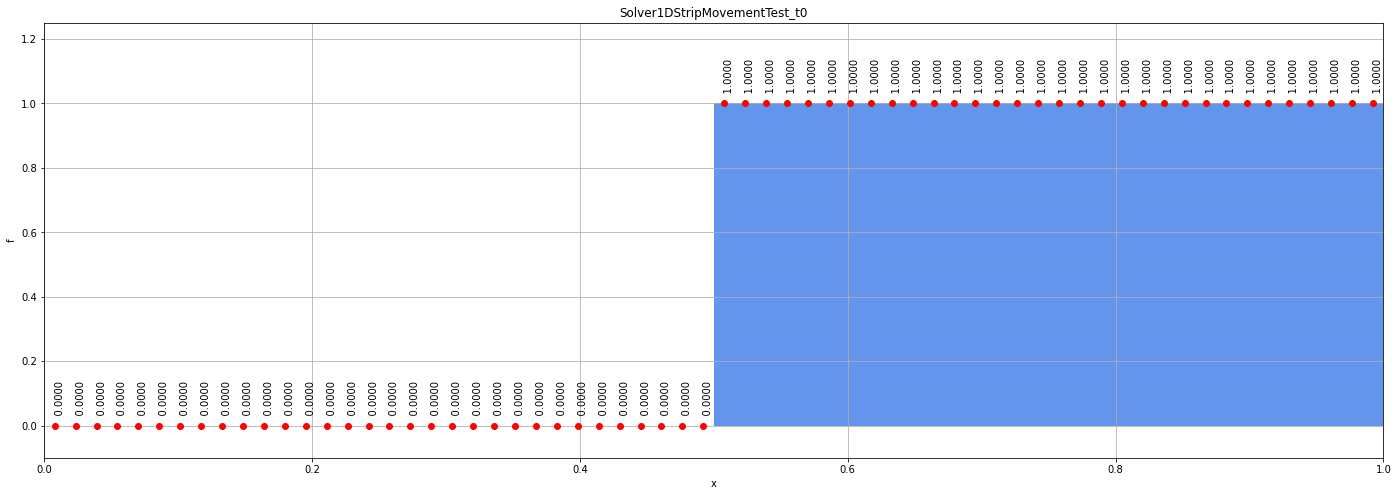

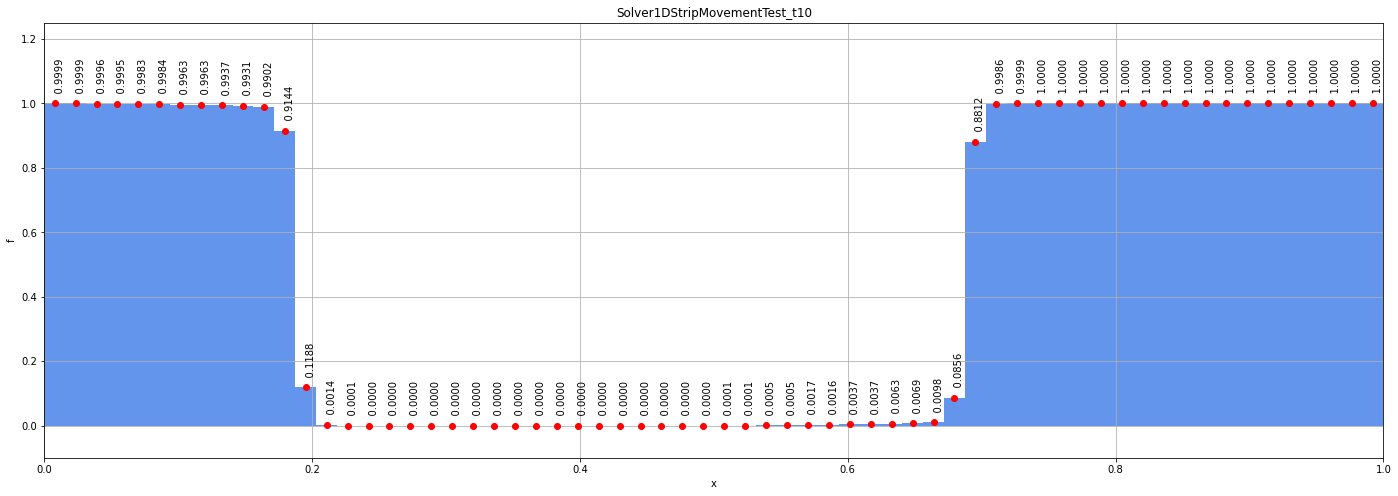

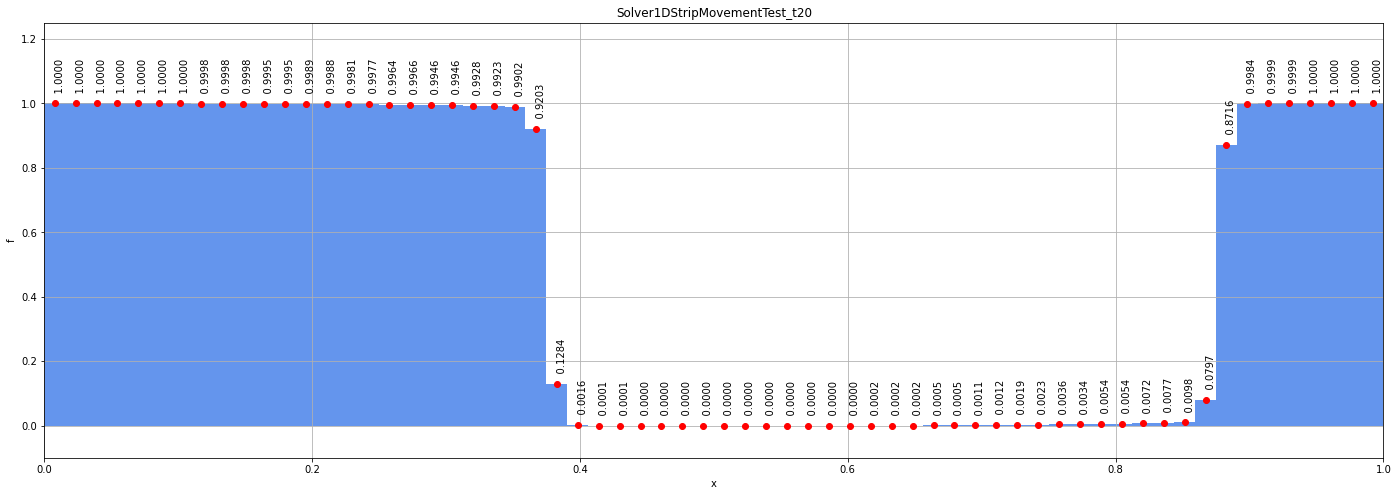

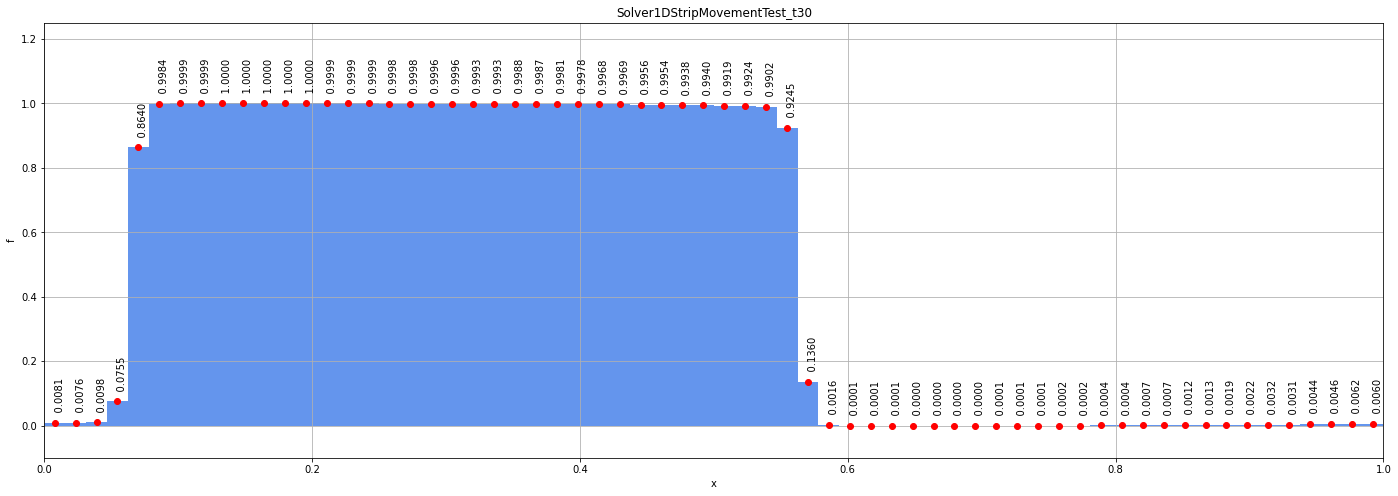

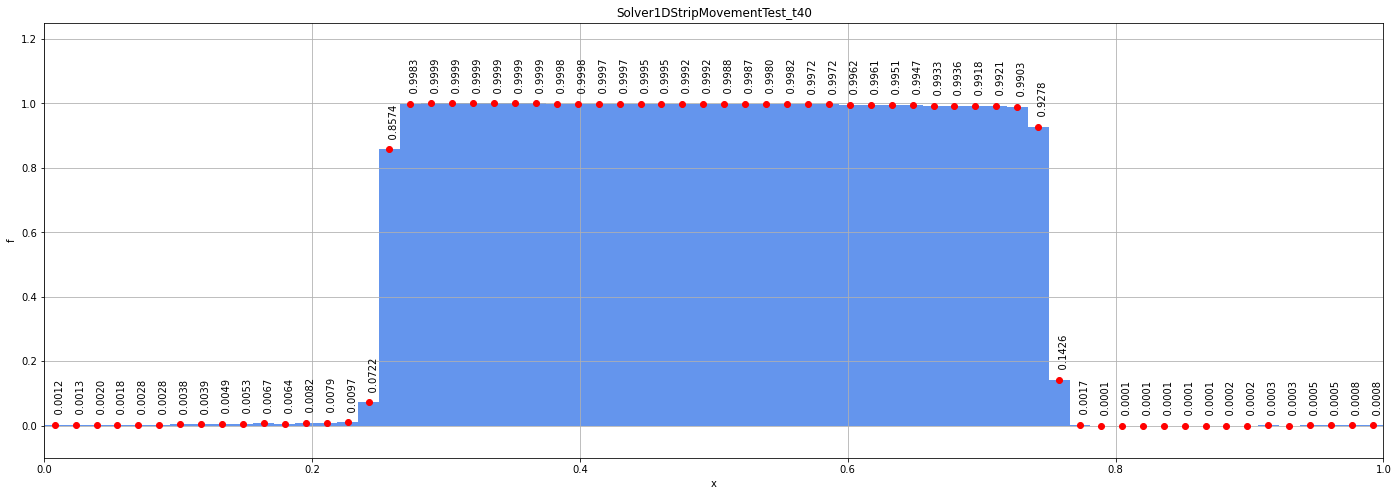

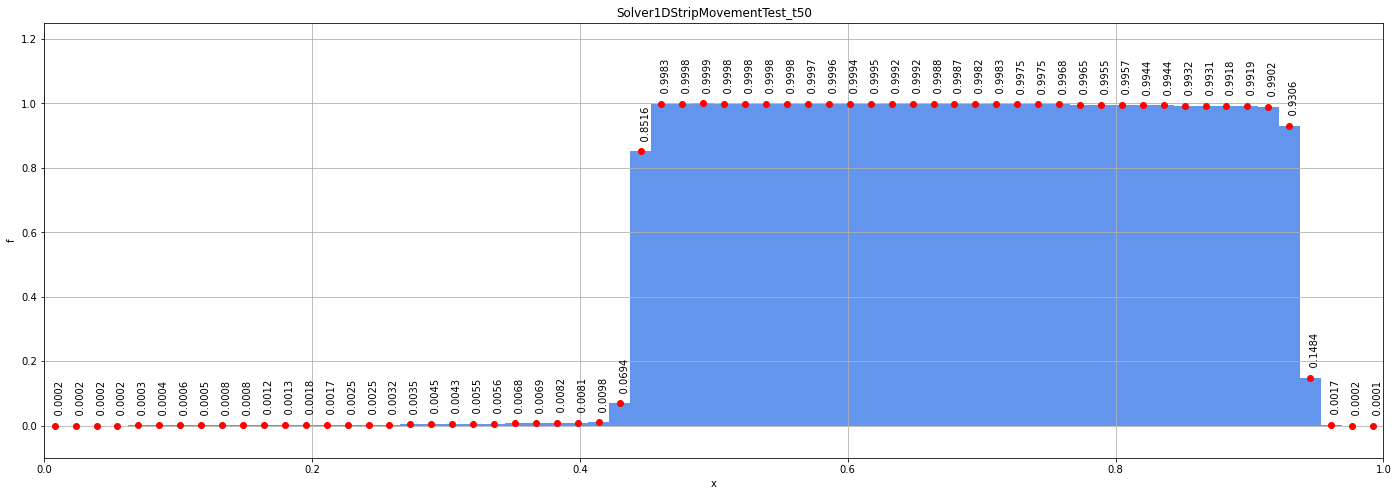

In [25]:
for t in range(0, len(frames), 10):
    plotArea1D(cellCount, dx, frames[t], title+"_t"+str(t))

#### Построение анимации

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  9.375
Animation real time step:  0.1875
Animation fps:  5.333333333333333


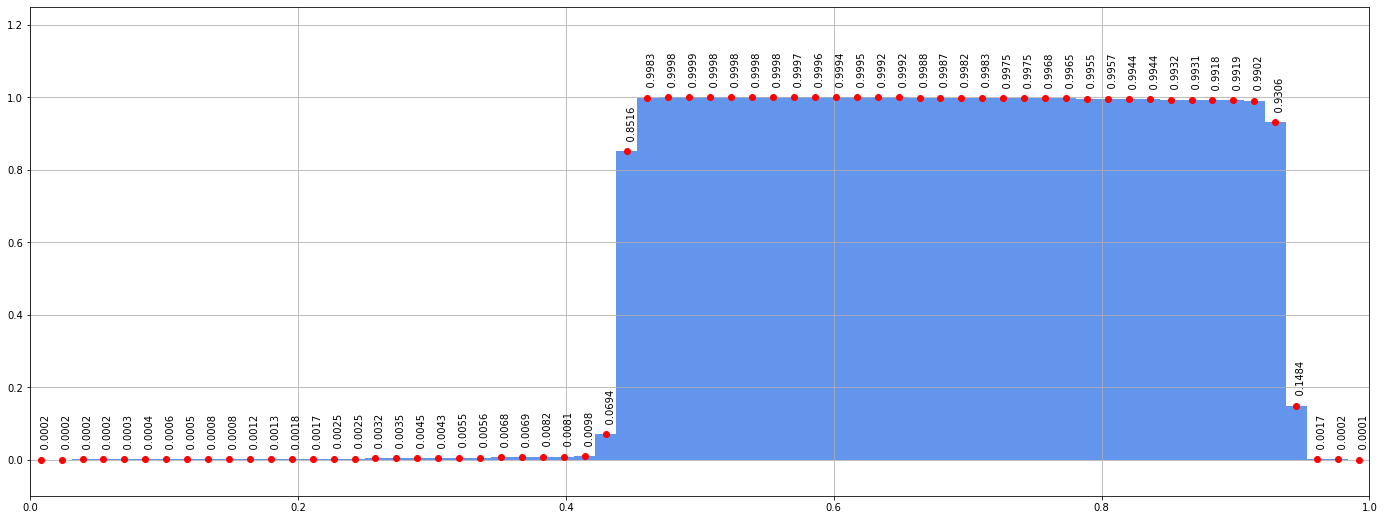

In [26]:
animation1D(cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames, 1, title)

## Solver1DStripBackMovementTest

In [31]:
title = "Solver1DStripBackMovementTest"
calcResPath = downDir(Calculation1DResultsPath, title)
plotOutPath = downDir(Plot1DOutputPath, title)

### Считывание значений

In [32]:
cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames = read1DMinimalOutput(downDir(calcResPath, "area_64_t_200.txt"))

### Построение графиков и анимации

#### Построение графиков

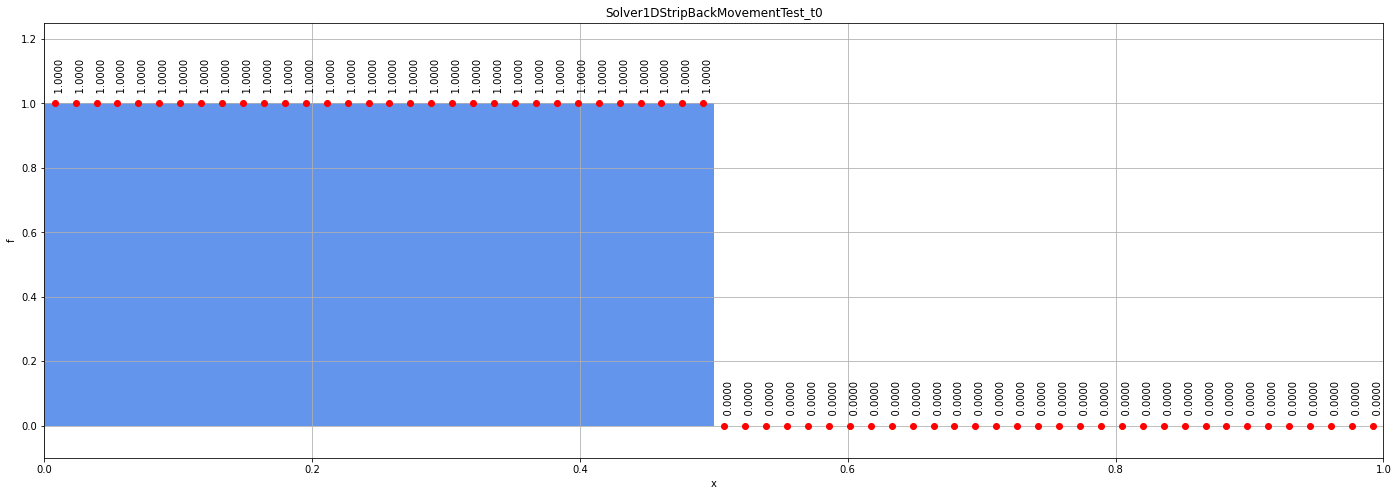

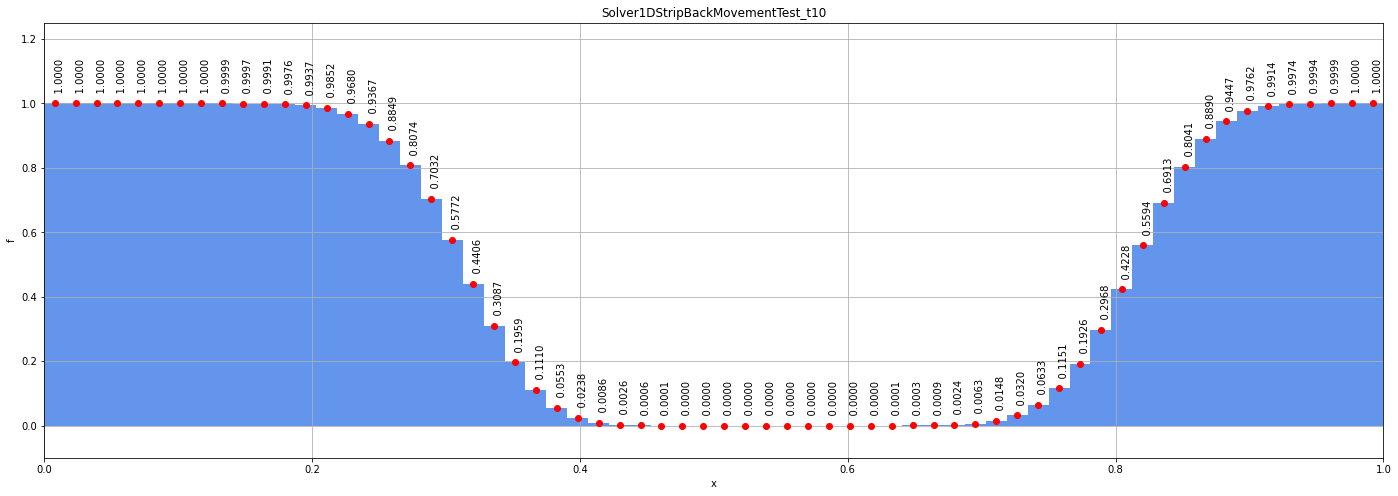

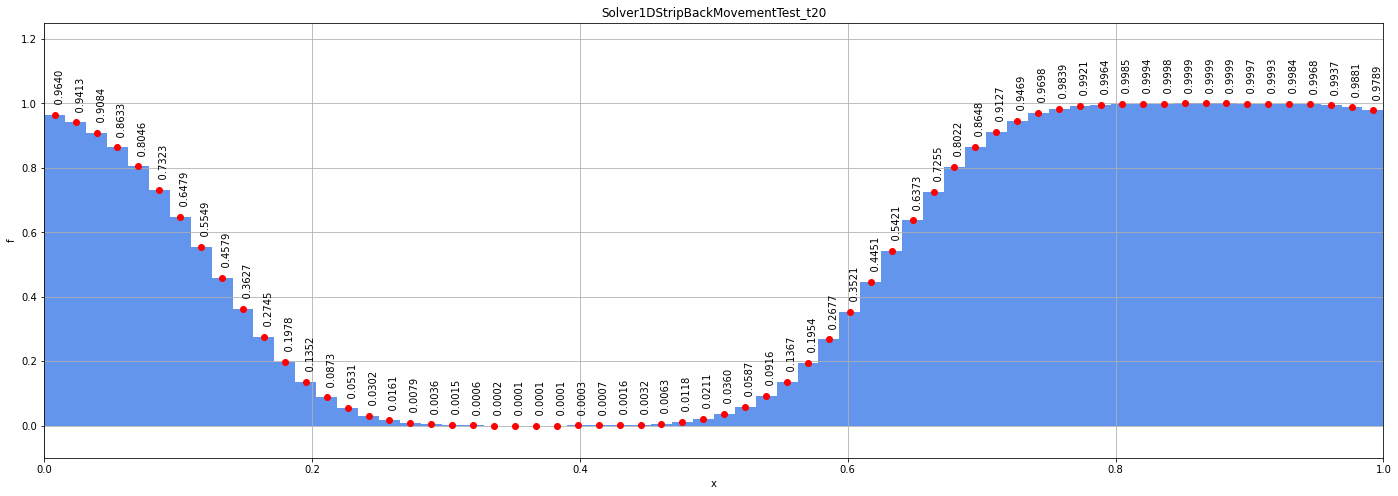

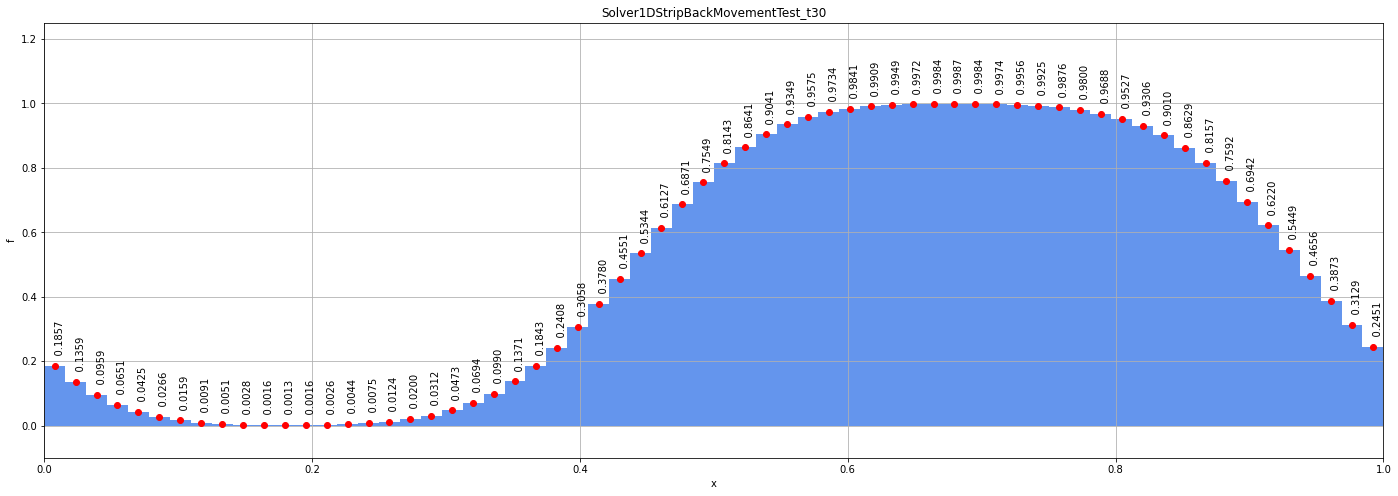

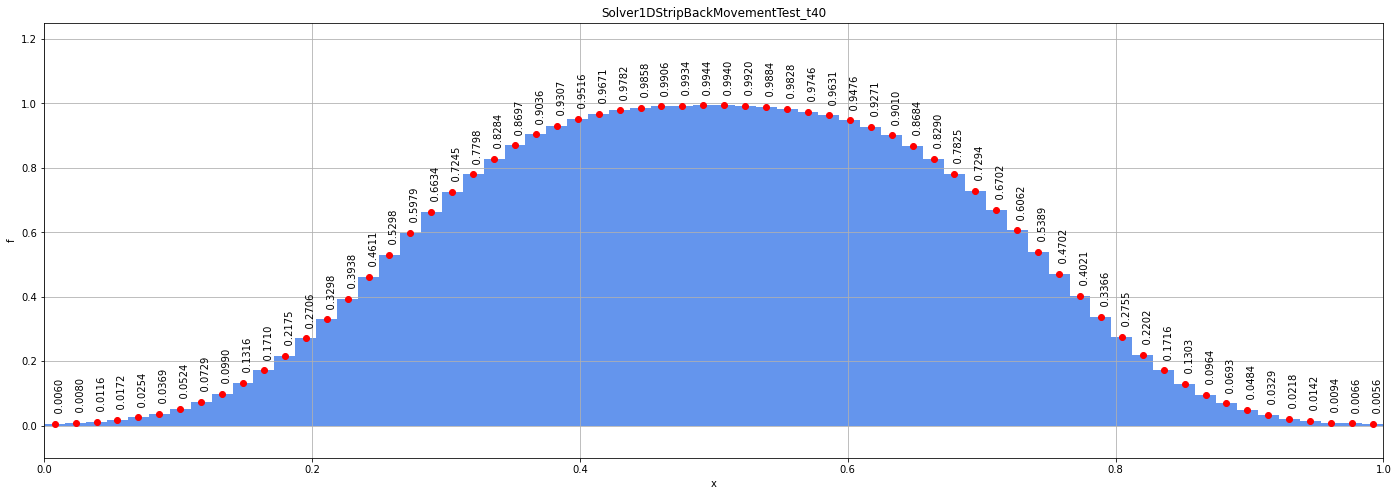

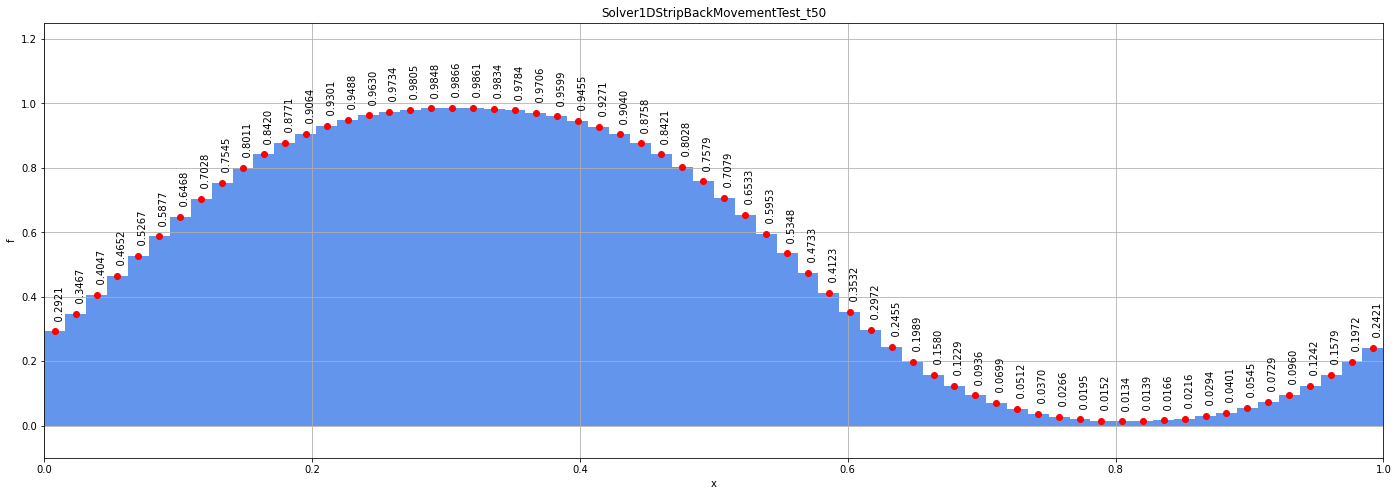

In [33]:
for t in range(0, len(frames), 10):
    plotArea1D(cellCount, dx, frames[t], title+"_t"+str(t))

#### Построение анимации

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  9.375
Animation real time step:  0.1875
Animation fps:  5.333333333333333


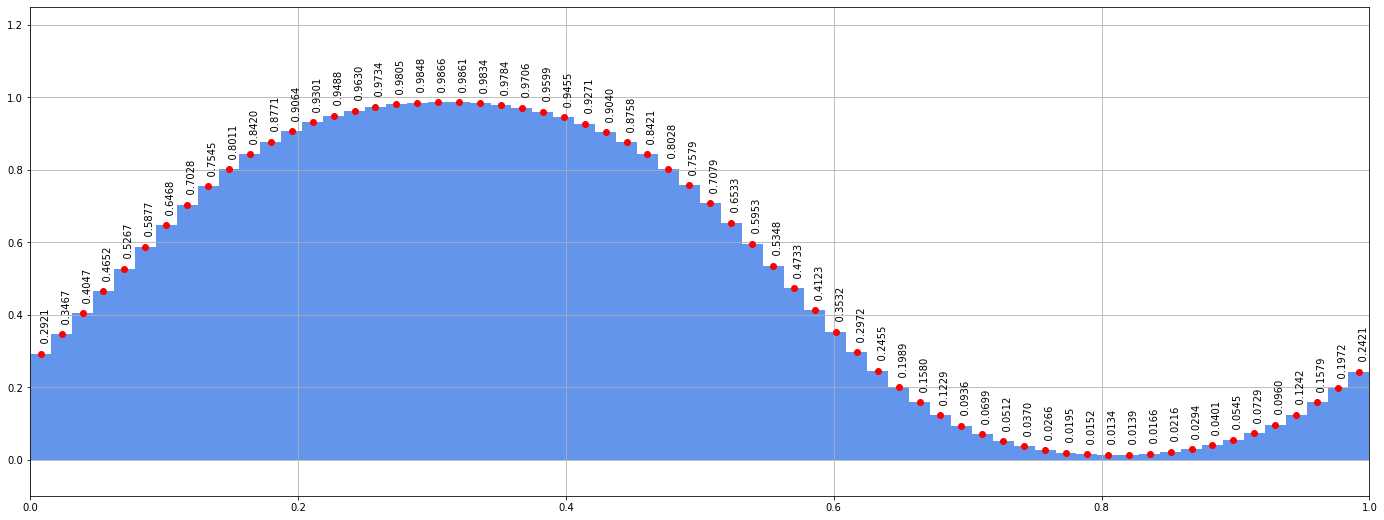

In [34]:
animation1D(cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames, 1, title)

## Solver1Dtests

In [16]:
title = "Solver1Dtests"
calcResPath = downDir(Calculation1DResultsPath, title)
plotOutPath = downDir(Plot1DOutputPath, title)

### Считывание финальных положений

In [17]:
CalculationResultsSubcats = [filename(subdir) for subdir in listSubdirs(calcResPath)]
print(CalculationResultsSubcats)
exact = "exact"

['Godunov', 'MUSCL', 'THINC_Godunov', 'THINC_MUSCL']


In [18]:
import re

solutions = {}
solutions[exact] = {}
meshes = {}
periodsT = []

for directory in listSubdirs(calcResPath):
    method = filename(directory)
    solutions[method] = {}
    for entry in os.listdir(directory):
        if "gitignore" in entry:
            continue
        
        cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames = read1DMinimalOutput(downDir(directory,entry))
        
        parsedEntry = re.findall(r'\d+', entry)
        N = cellCount
        T = int(parsedEntry[1])
        
        if not (N in meshes):
            meshes[N] = dx
        if not (T in periodsT):
            periodsT.append(T)
        
        if not (N in solutions[method]):
            solutions[method][N] = {}
            
        solutions[method][N][T] = frames[-1]
        
        if (not (N in solutions[exact])) and T==1:
            solutions[exact][N] = frames[0]

meshesN = sorted(meshes.keys())


##### Были получены результаты на сетках:

In [19]:
print(meshes)
print(meshesN)

{192: 0.00520833, 24: 0.0416667, 384: 0.00260417, 48: 0.0208333, 768: 0.00130208, 96: 0.0104167}
[24, 48, 96, 192, 384, 768]


##### И с периодами обращений по исследуемой области:

In [20]:
periodsT

[1, 2, 3, 4, 5, 6]

#### Считывание файла ошибок:

In [21]:
file = open(downDir(calcResPath, "error.txt"), "r")

errors = {}

for k, method in enumerate(CalculationResultsSubcats):
    errors[method]={}
    file.readline()
    file.readline()
    file.readline()
    
    for i, N in enumerate(meshesN):
        errors[method][N]={}
        line = file.readline()
        errorLine = [float(val) for val in line.split("\t") if not (("N" in val ) or len(val)<3)]
        for j, T in enumerate(periodsT):
            errors[method][N][T] = errorLine[j]

In [22]:
# TODO print error tables

### Сравнение решений различных схем

In [23]:
lineStyles = {}
colorPallete = ["r-", "b-", "g-", "c-", "m-"];
for i, method in enumerate(solutions.keys()):
    lineStyles[method] = colorPallete[i]
lineStyles

{'exact': 'r-',
 'Godunov': 'b-',
 'MUSCL': 'g-',
 'THINC_Godunov': 'c-',
 'THINC_MUSCL': 'm-'}

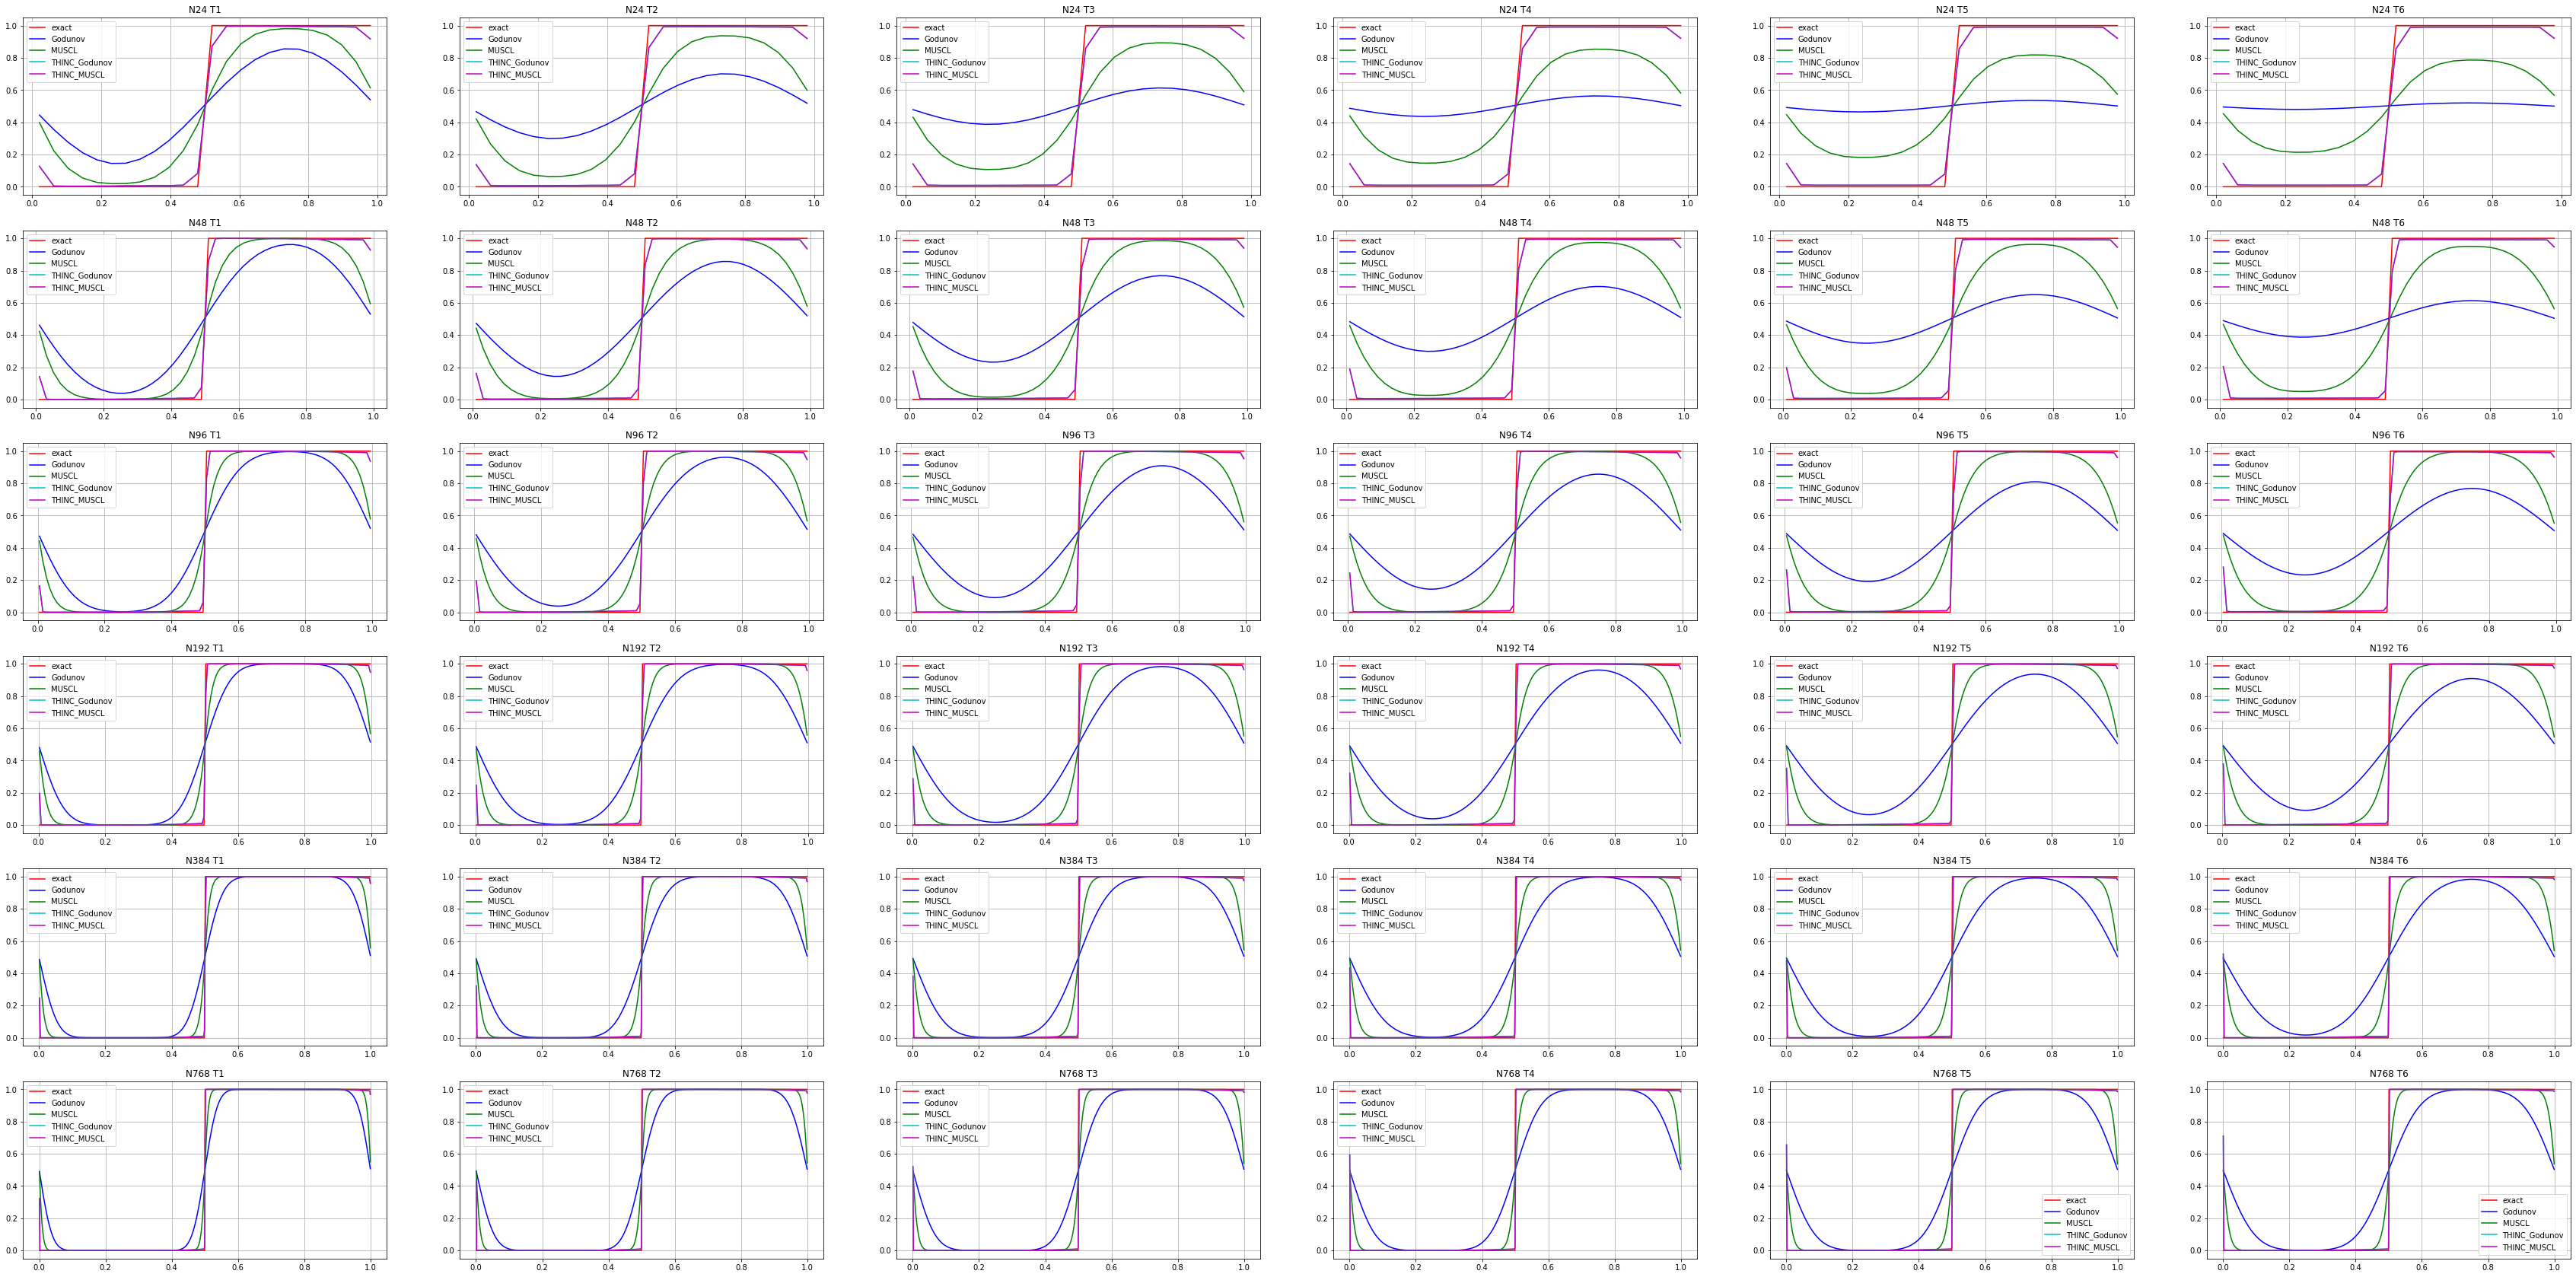

In [24]:
fig, axs = plt.subplots(6, 6, figsize=(60,30))

for iN, N in enumerate(meshesN):
    for iT, T in enumerate(periodsT):
        dx = meshes[N]
        x = xCells(N, dx)
        for method in solutions.keys():
            if method == exact:
                y = solutions[method][N]
            else:
                y = solutions[method][N][T]
            axs[iN, iT].plot(x, y, lineStyles[method], label=method)
        axs[iN, iT].grid()
        axs[iN, iT].set_title("N"+str(N)+" T"+str(T))
        axs[iN, iT].legend()
#for ax in axs.flat:
    #ax.set(xlabel='x', ylabel='f')
plt.savefig(downDir(plotOutPath,"solutions.png"))



### Сравнение решений на различных сетках для всех периодов и методов 

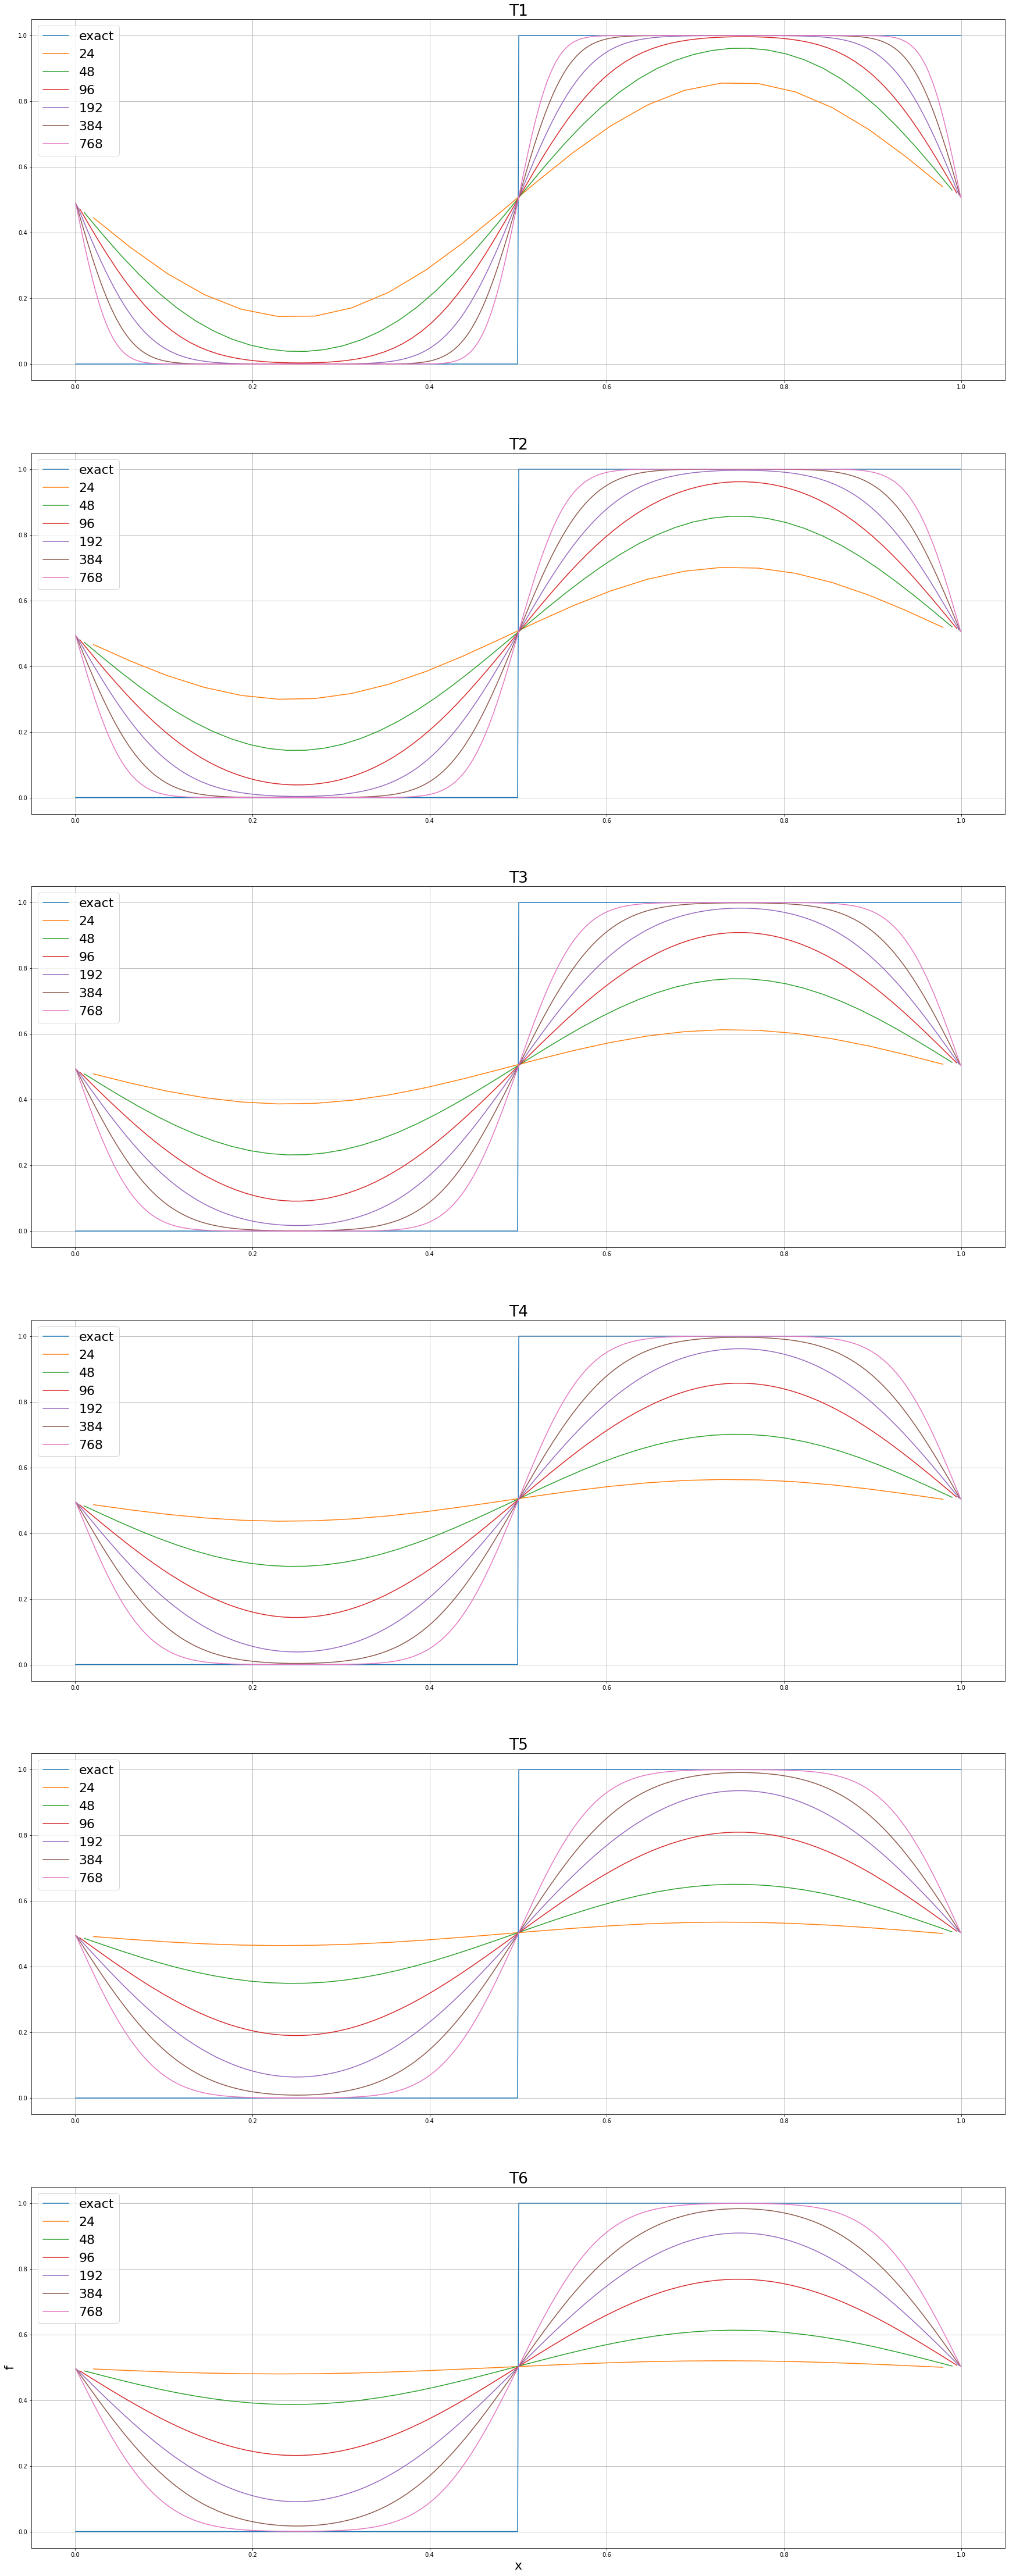

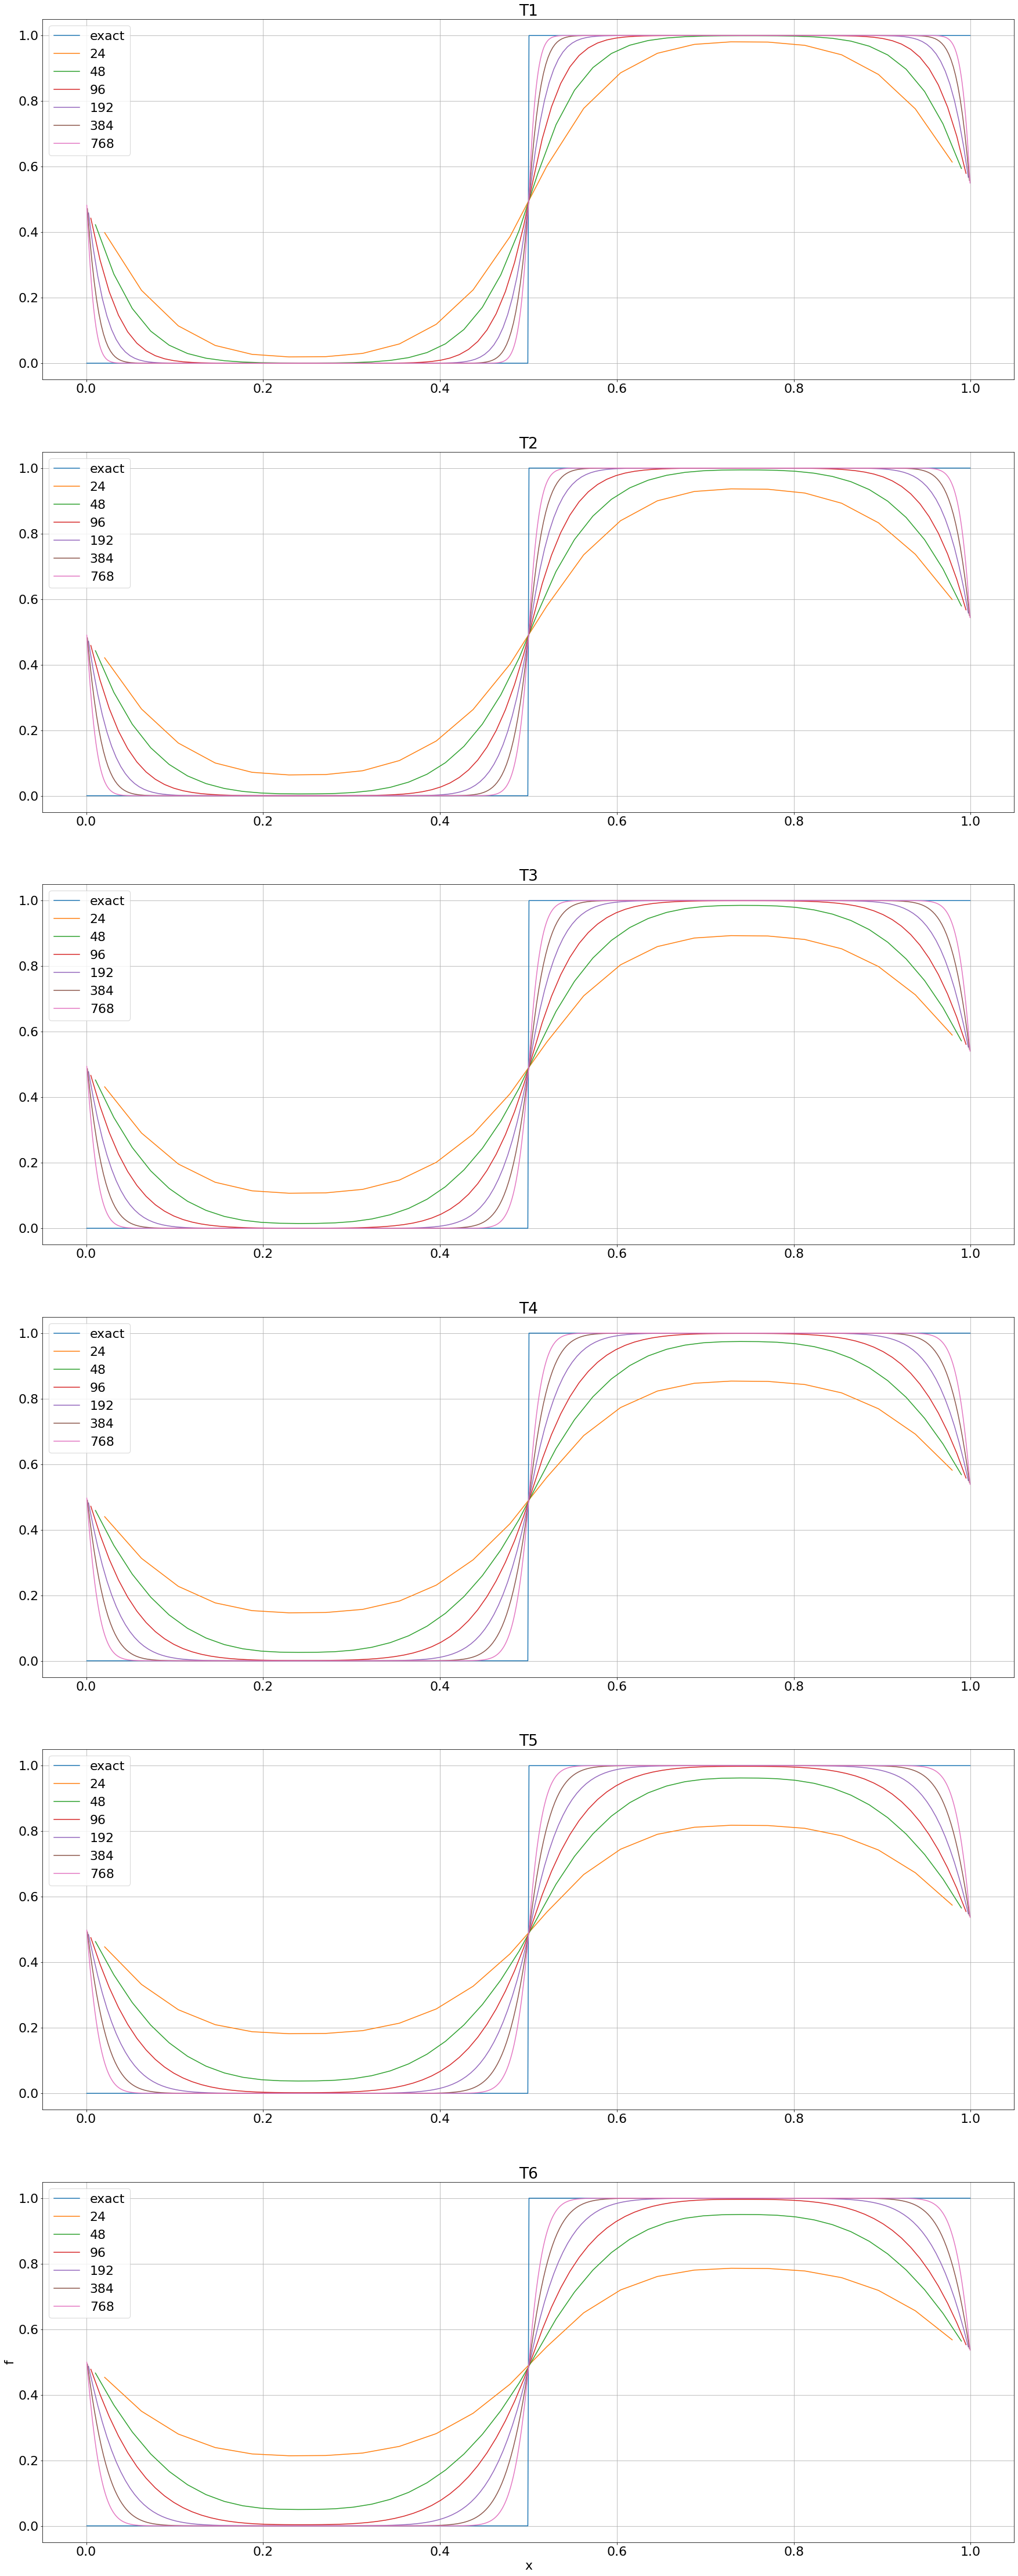

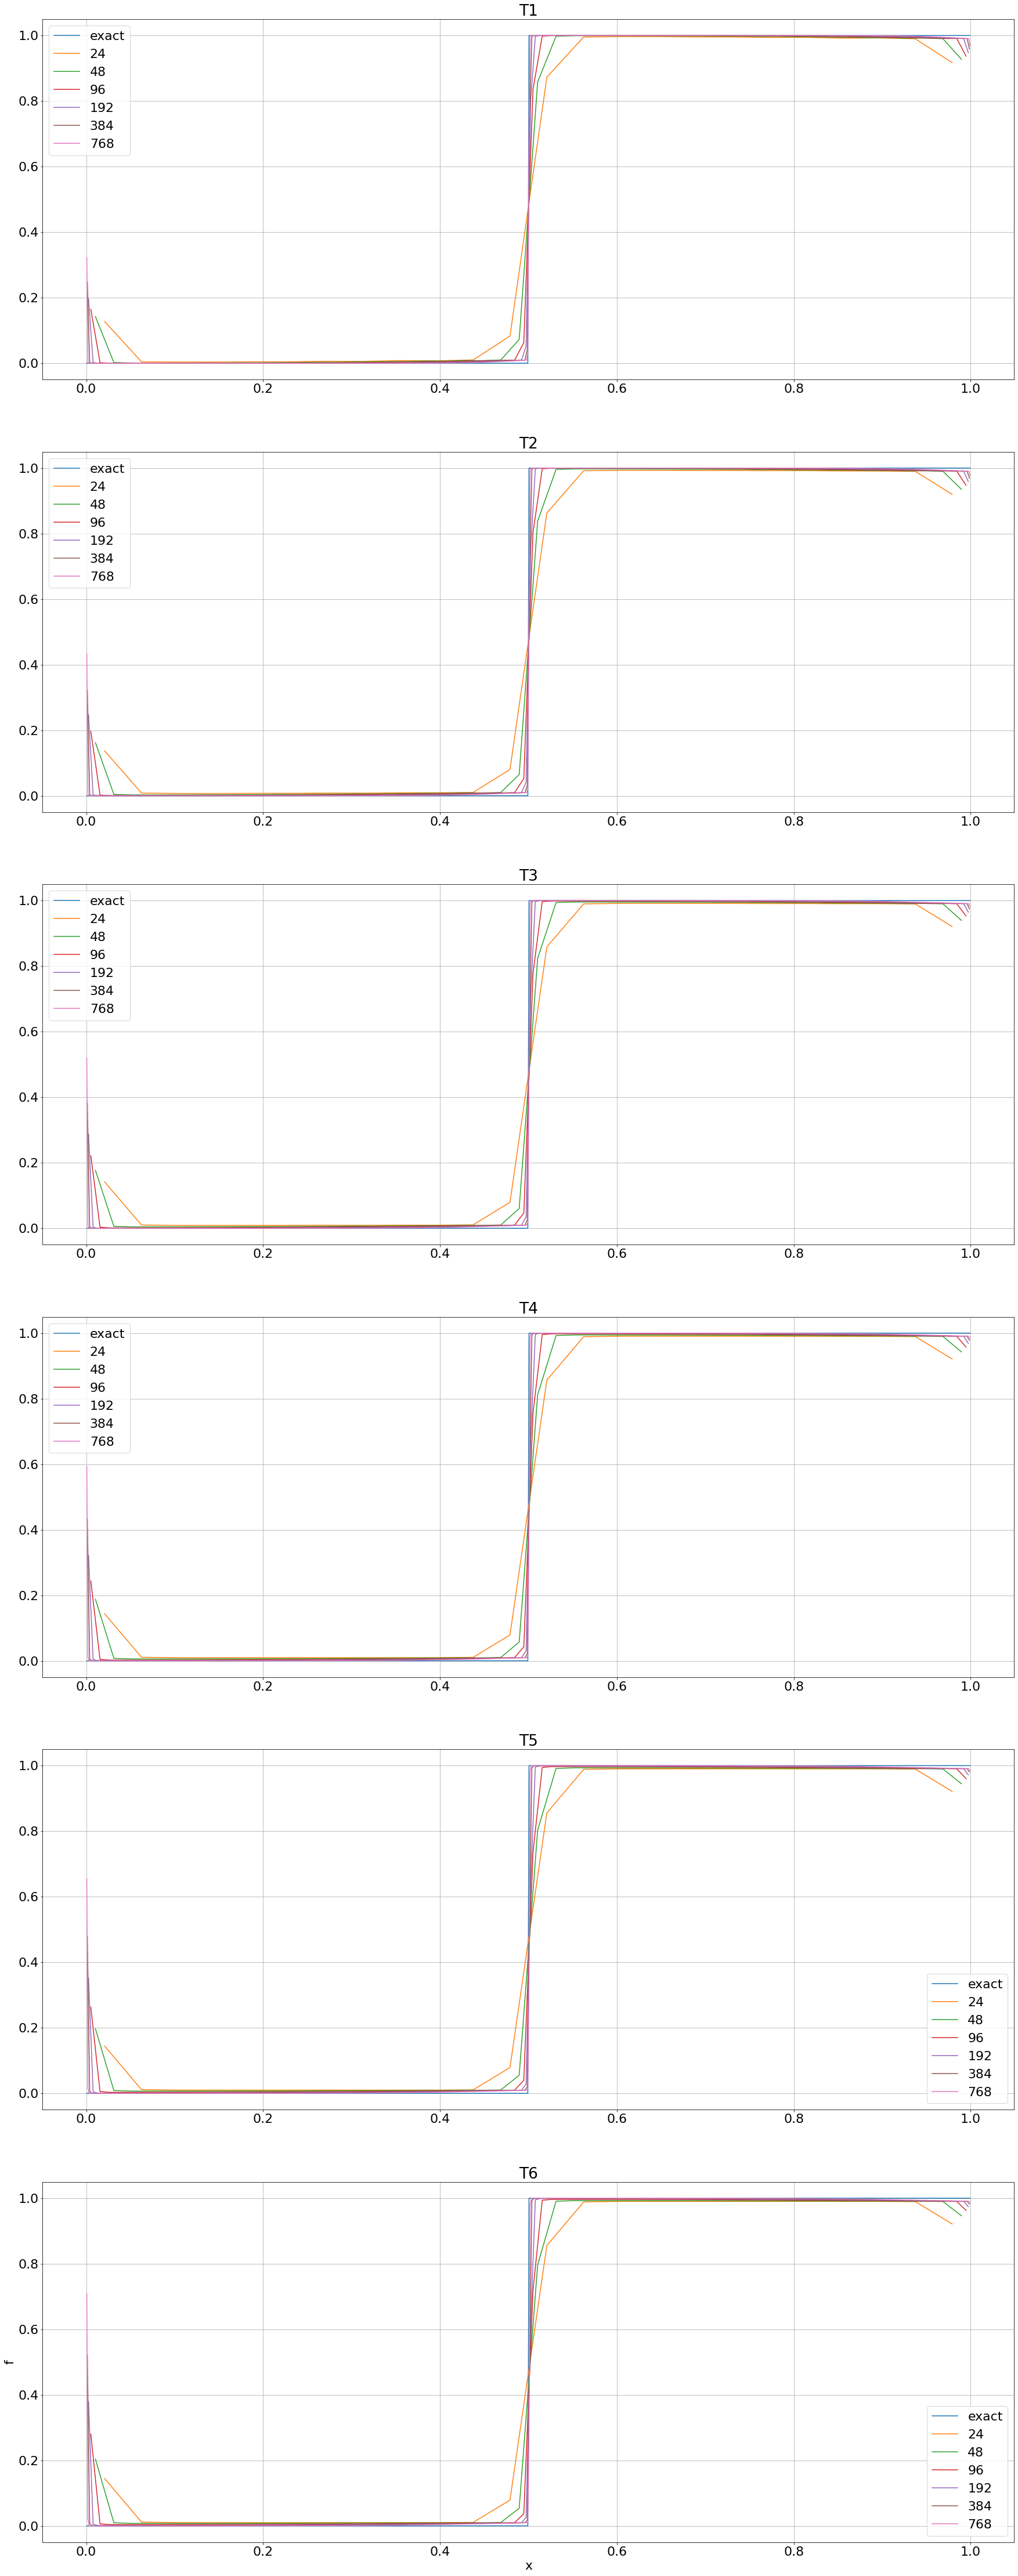

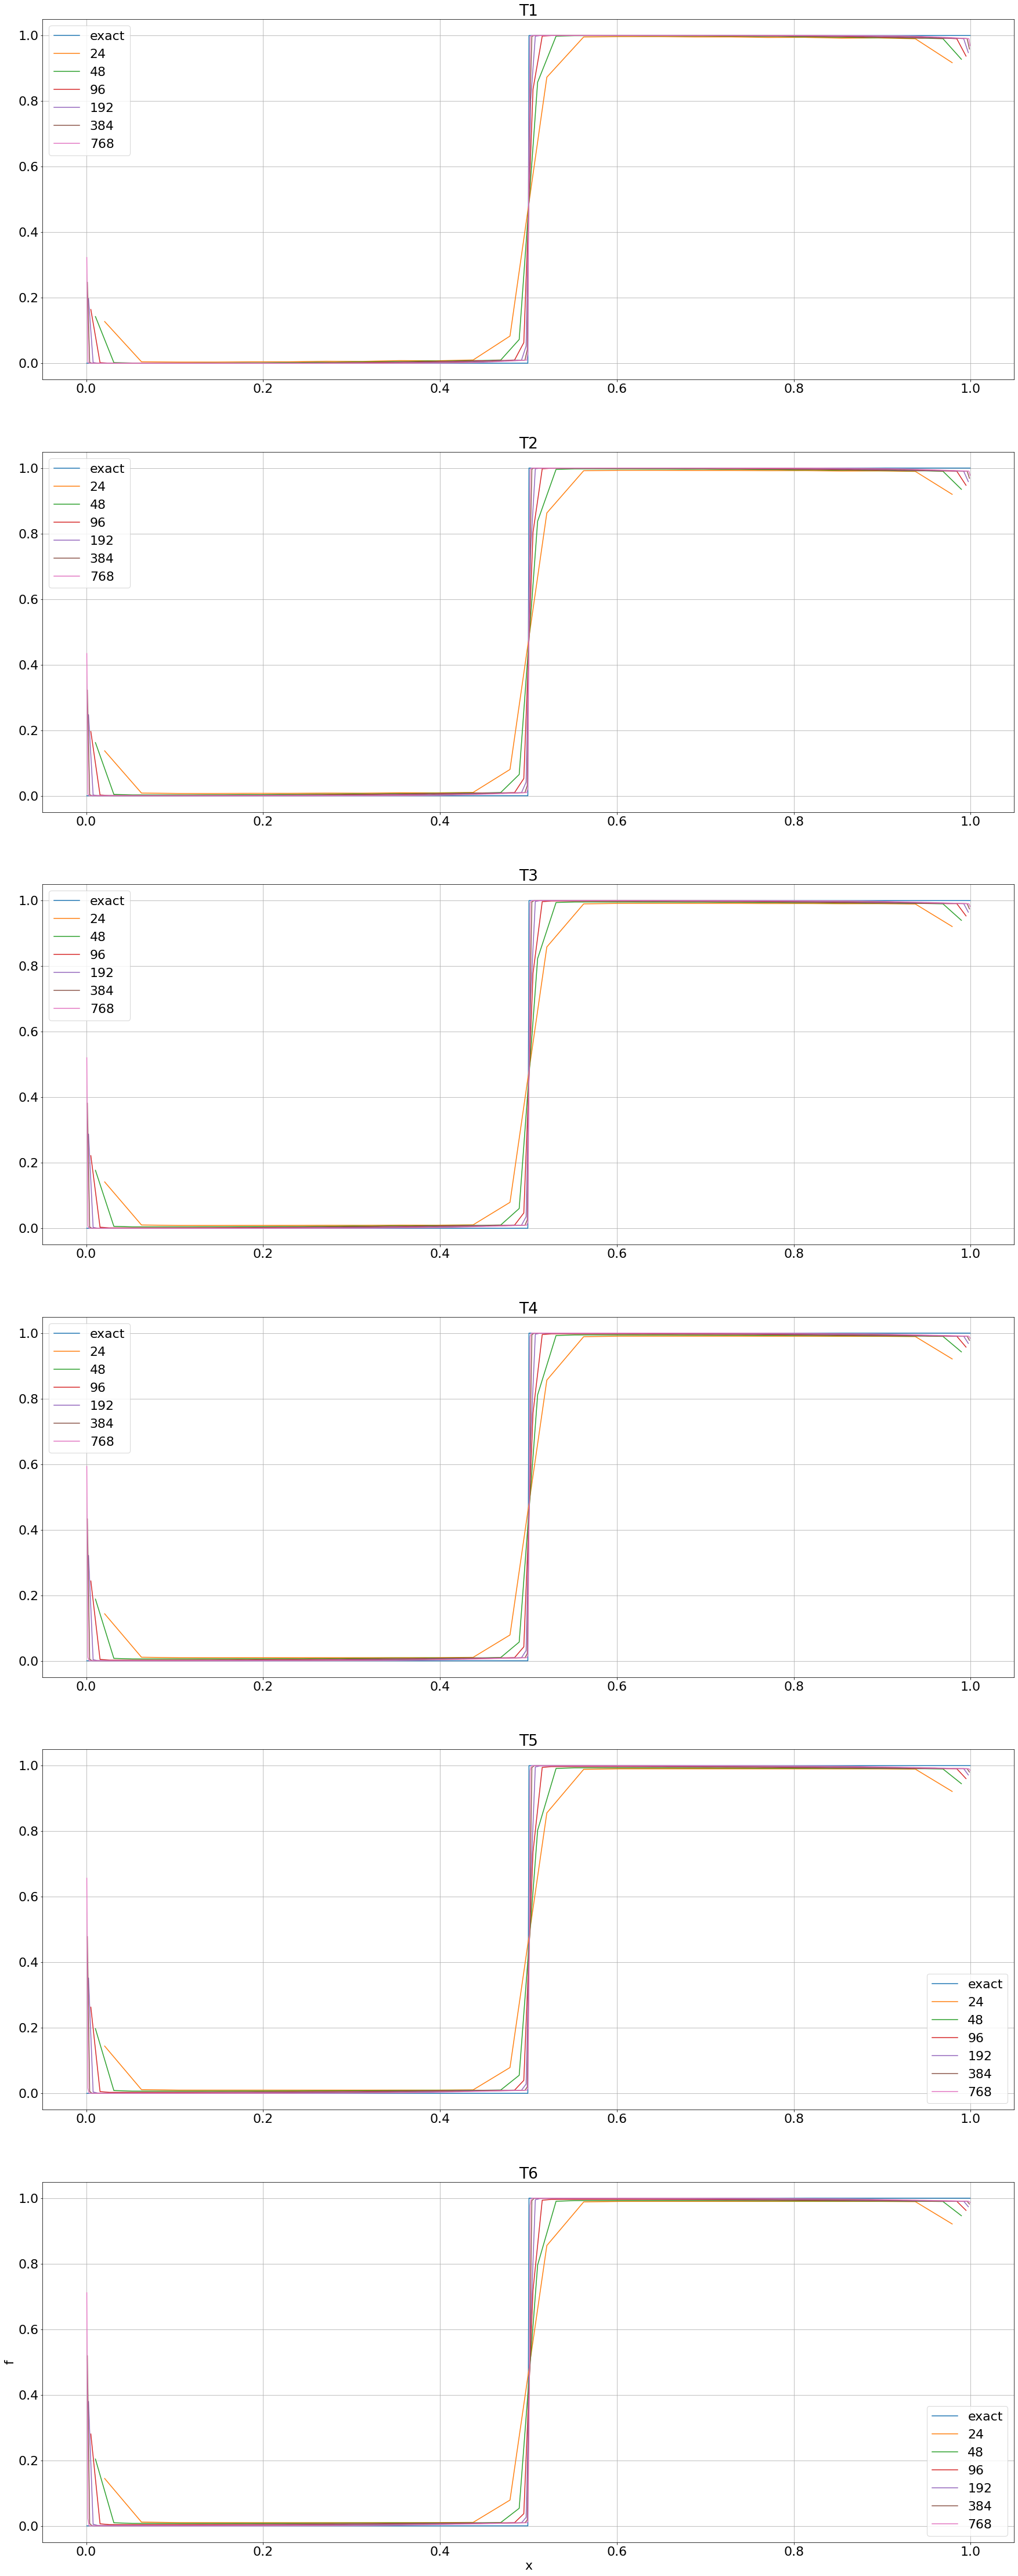

In [25]:
for method in solutions.keys():
    if method == exact:
        continue
    fig, axs = plt.subplots(6, 1, figsize=(30,80))
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('x', fontsize=22)
    plt.ylabel('f', fontsize=22)
    for iT, T in enumerate(periodsT): 
        
        x = xCells(meshesN[-1], meshes[meshesN[-1]])
        y = solutions["exact"][meshesN[-1]]
        axs[iT].plot(x, y, label=exact)
    
        for iN, N in enumerate(meshesN):
            x = xCells(N, meshes[N])
            y = solutions[method][N][T]
            axs[iT].plot(x, y, label=str(N))
        
        axs[iT].grid()
        
        axs[iT].set_title("T"+str(T))
        axs[iT].legend()
    
    plt.savefig(downDir(plotOutPath, method+".png"))

### Графики ошибки и исследование сходимости

Метод обладает сходимостью степени b если существует 0 < a <= 1 :
существует натуральное N и для любого n>=N:
error(n, T) < a * error(n-1, T) ^ b

Скорость сходимости была оценена как тангенс угла наклона графика зависимости log(error(n, T)) от log(error(n-1, T)).
так как
log(error(n, T)) < log(a) + k * log(error(n-1, T))

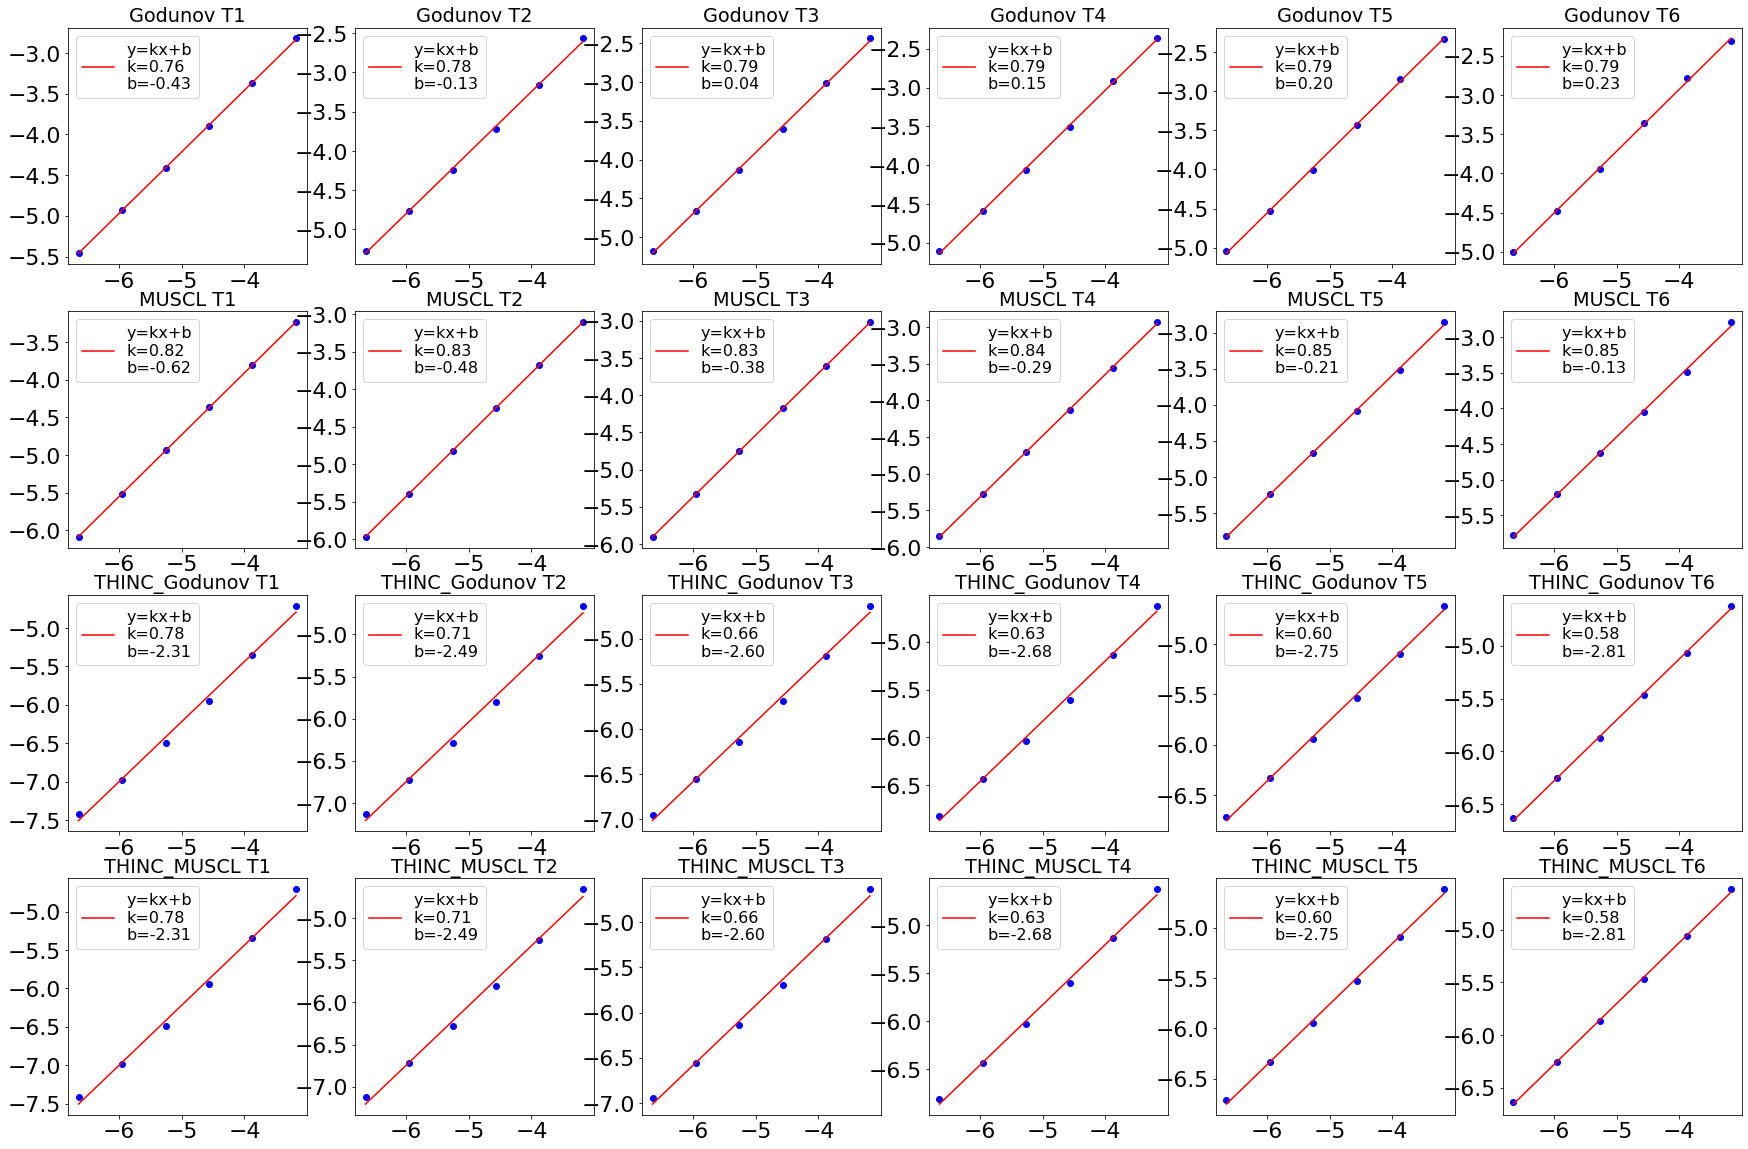

In [26]:
import numpy as np
import math

fig, axs = plt.subplots(4, 6, figsize=(30,20))
plt.rcParams.update({'font.size': 16})

for m, method in enumerate(CalculationResultsSubcats):
    if method == exact:
        continue
    for i, T in enumerate(periodsT):
        x = []
        y = []
        for N in meshesN:
            x.append(math.log(meshes[N]))
            #x.append(math.log(errors[method][meshesN[j-1]][T]))
            y.append(math.log(errors[method][N][T]))
        kb = np.polyfit(x,y,1)
        xApprox = [min(x), max(x)]
        yApprox = [kb[0]*xApprox[0]+kb[1], kb[0]*xApprox[1]+kb[1]]
        
        axs[m, i].plot(x, y, 'bo')
        axs[m, i].plot(xApprox, yApprox, 'r-', label='y=kx+b\nk='+"{:.2f}".format(kb[0])+"\nb="+"{:.2f}".format(kb[1]))
        axs[m, i].legend()
        axs[m, i].set_title(method+" T"+str(T))
plt.savefig(downDir(plotOutPath, "ErrorConvergence.png"))

### Построение некоторых графиков избранных расчетов

In [27]:
datafname = "N768_T1"
plotTitle = CalculationResultsSubcats[3]+"_"+datafname;

In [28]:
framesDataPath = downDir(downDir(calcResPath, CalculationResultsSubcats[3]), datafname + ".txt")
print(framesDataPath)

C:\Programing\Projects\DigitalGeometry\Programs\Output\CalculationResults\Solver1D\Solver1Dtests\THINC_MUSCL\N768_T1.txt


In [29]:
cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames = read1DMinimalOutput(framesDataPath)

#### Графики:

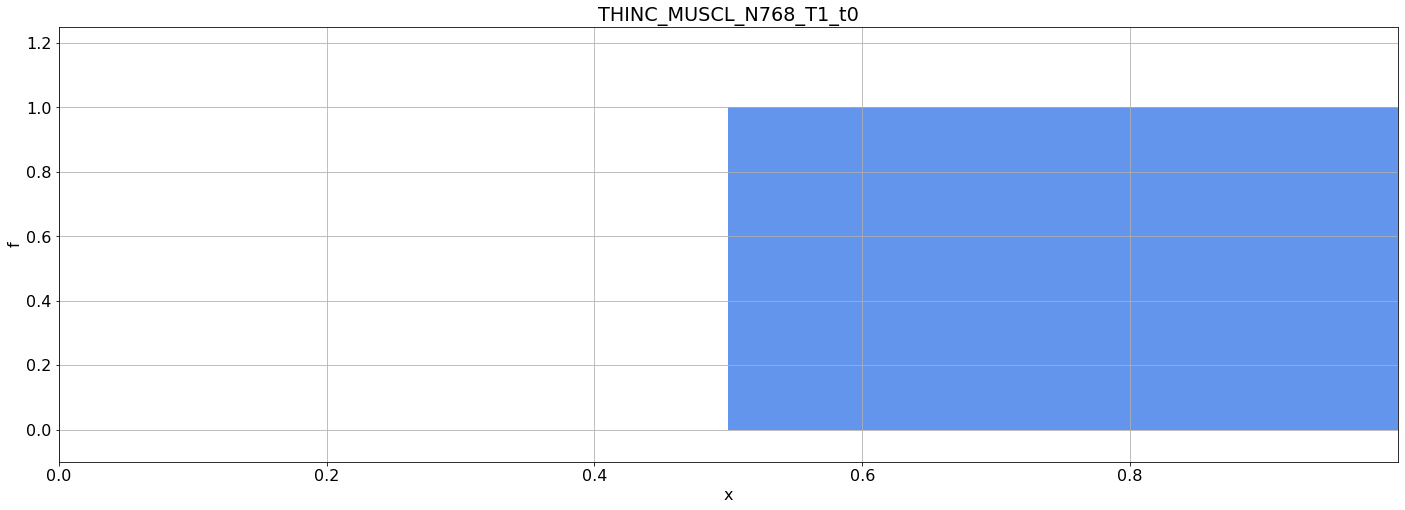

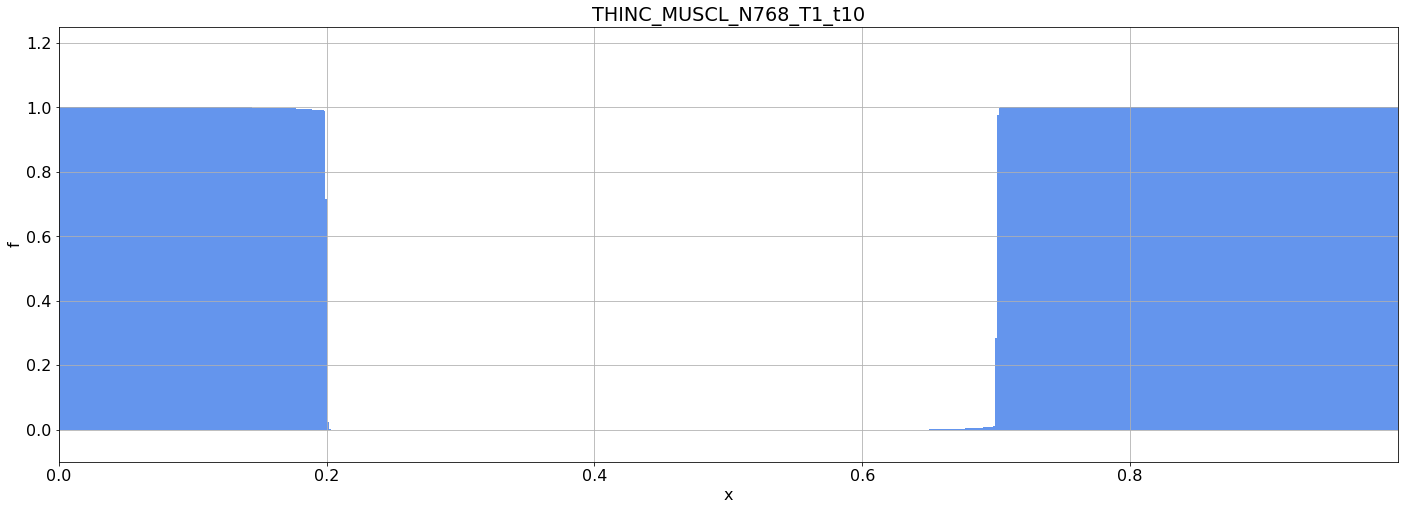

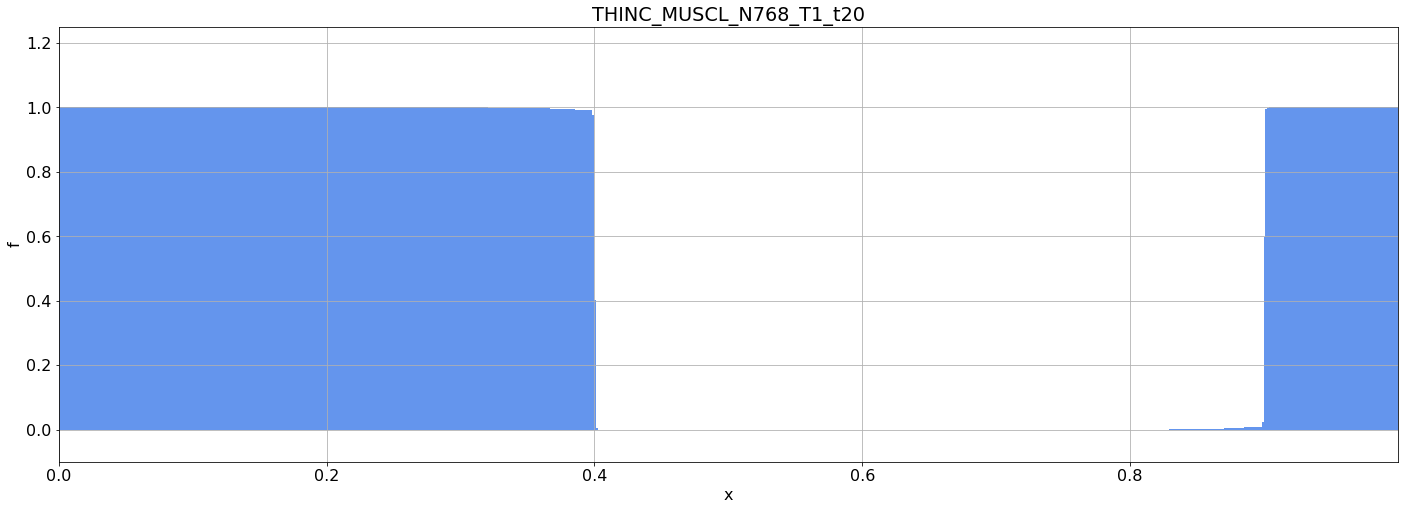

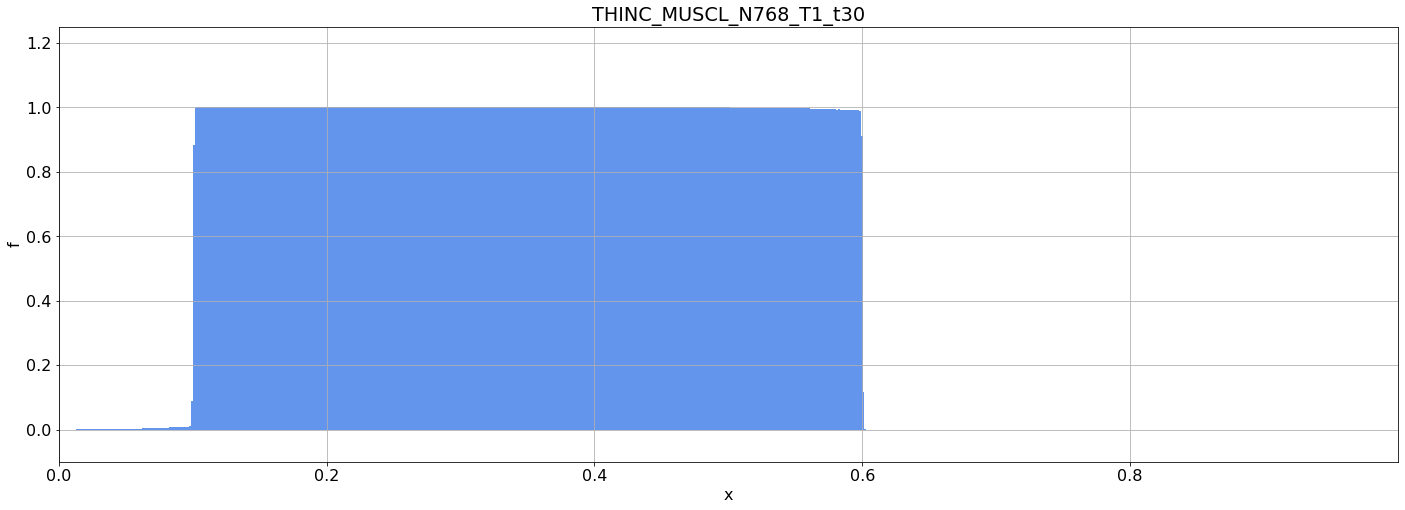

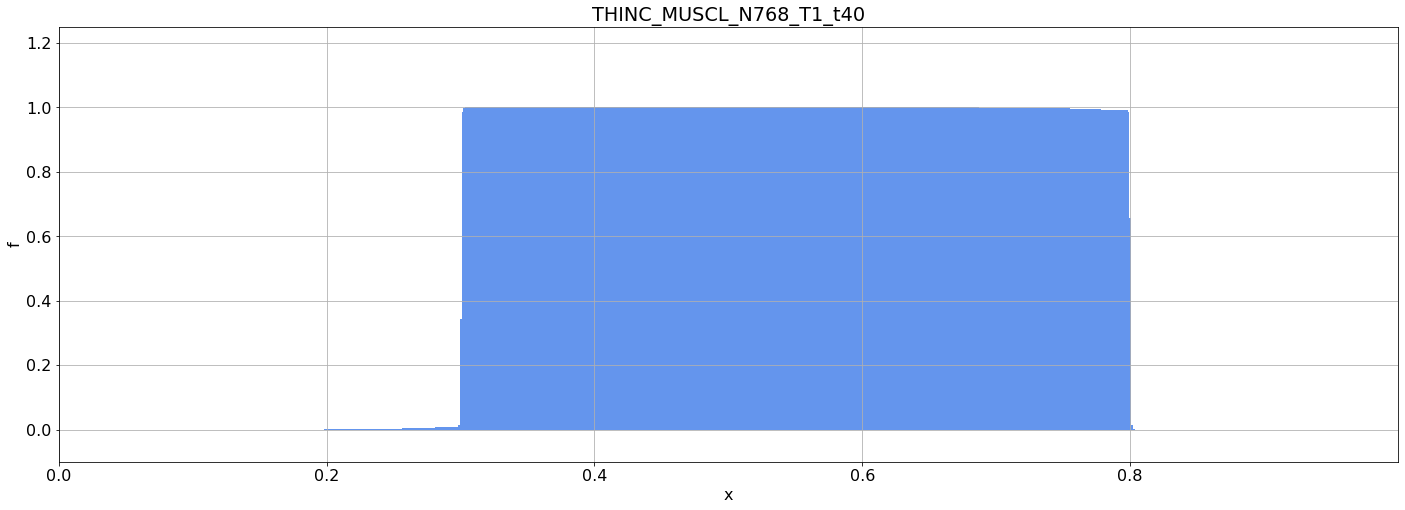

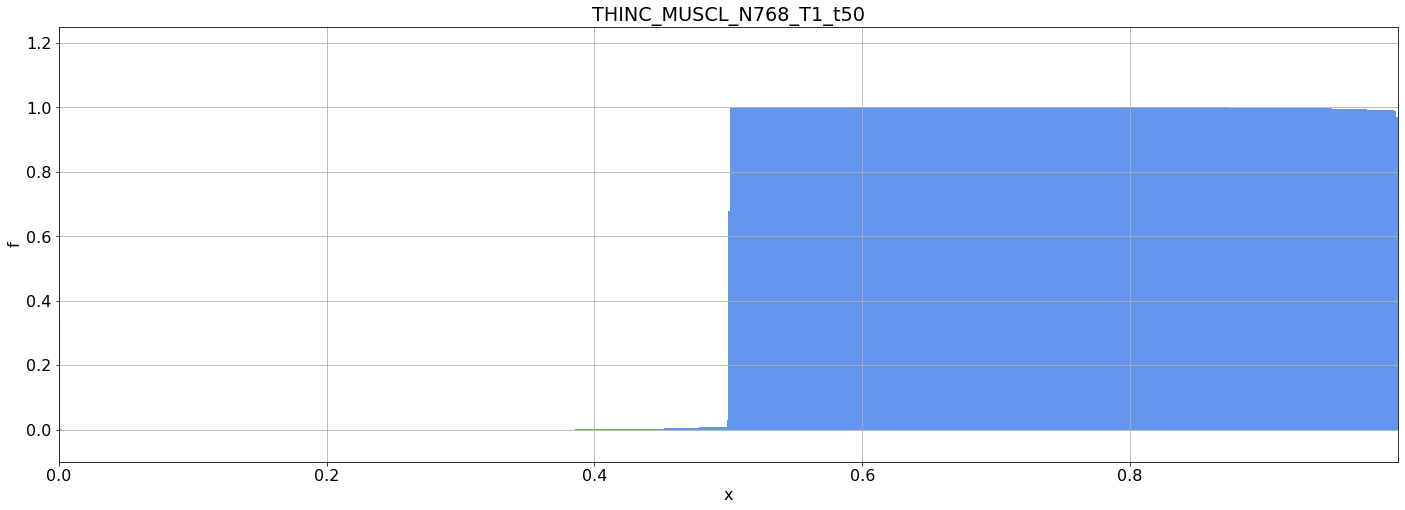

In [30]:
for t in range(0, len(frames), 10):
    plotArea1D(cellCount, dx, frames[t], plotTitle+"_t"+str(t))

#### Запись анимации движения

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  10.0
Animation real time step:  0.2
Animation fps:  5.0


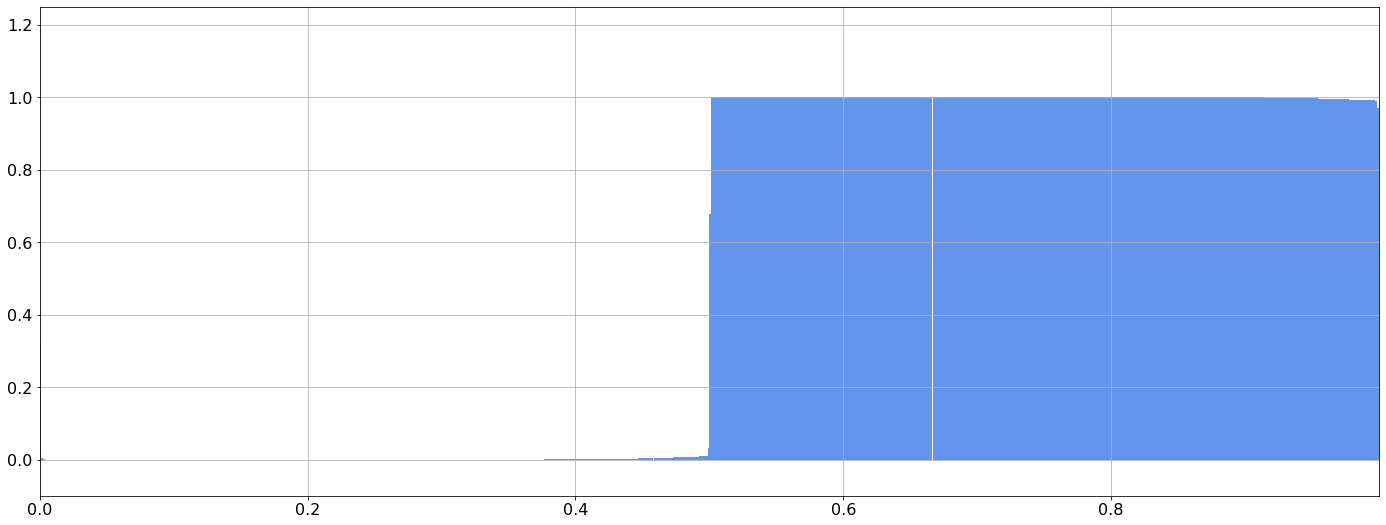

In [31]:
animation1D(cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames, 1, plotTitle)